# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
import pandas as pd
from matplotlib import  pyplot as plt #Cargar todas las librerías
from math import factorial
from scipy import stats as st
import math as math
import numpy as np

## Cargar datos

In [2]:
df_users = pd.read_csv('./datasets/megaline_users.csv')
df_calls = pd.read_csv('./datasets/megaline_calls.csv')
df_messages =pd.read_csv('./datasets/megaline_messages.csv')
df_internet = pd.read_csv('./datasets/megaline_internet.csv')
df_plans = pd.read_csv('./datasets/megaline_plans.csv')

# Carga los archivos de datos en diferentes DataFrames


## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:

df_plans.info()
# Imprime la información general/resumida sobre el DataFrame de las tarifas



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
df_plans.head() # Imprime una muestra de los datos para las tarifas



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [5]:
print(df_plans.isna().sum())
print()
df_plans.duplicated().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64



0

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Usuarios/as

In [6]:
df_users.info() # Imprime la información general/resumida sobre el DataFrame de usuarios



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
df_users.head(20) # Imprime una muestra de datos para usuarios



,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [8]:
print(df_users.isna().sum())
print()
df_users.duplicated().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64



0

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [9]:
df_users['reg_date']= pd.to_datetime(df_users['reg_date'], format= '%Y-%m-%d')
df_users['reg_month']= df_users['reg_date'].dt.month
df_users['churn_date']= pd.to_datetime(df_users['churn_date'], format= '%Y-%m-%d')
df_users['churn_month']= df_users['churn_date'].dt.month


In [10]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      500 non-null    int64         
 1   first_name   500 non-null    object        
 2   last_name    500 non-null    object        
 3   age          500 non-null    int64         
 4   city         500 non-null    object        
 5   reg_date     500 non-null    datetime64[ns]
 6   plan         500 non-null    object        
 7   churn_date   34 non-null     datetime64[ns]
 8   reg_month    500 non-null    int64         
 9   churn_month  34 non-null     float64       
dtypes: datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 39.2+ KB


In [11]:
df_users.rename(columns= {'plan':'plan_name'}, inplace = True)

## Llamadas

In [12]:
 df_calls.info()

 # Imprime la información general/resumida sobre el DataFrame de las llamadas



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [13]:
print(df_calls.head()) # Imprime una muestra de datos para las llamadas

df_calls.describe()

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [14]:
print(df_calls.isna().sum())
print()
print(df_calls.duplicated().sum())
print()
print(df_calls['call_date'].dtype)

id           0
user_id      0
call_date    0
duration     0
dtype: int64

0

object


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [15]:

df_calls['call_date']= pd.to_datetime(df_calls['call_date'], format= '%Y-%m-%d')
df_calls['month']= df_calls['call_date'].dt.month


In [16]:
df_calls.rename(columns= {'id':'call_id'}, inplace = True)

## Mensajes

In [17]:
print(df_messages.info())
# Imprime la información general/resumida sobre el DataFrame de los mensajes
df_messages.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [18]:
df_messages.head() # Imprime una muestra de datos para los mensajes



,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [19]:
print(df_messages.isna().sum())
print()
df_messages.duplicated().sum()

id              0
user_id         0
message_date    0
dtype: int64



0

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [20]:
df_messages['message_date']= pd.to_datetime(df_messages['message_date'], format= '%Y-%m-%d')
df_messages['month']= df_messages['message_date'].dt.month

In [21]:
df_messages.rename(columns= {'id':'message_id'}, inplace = True)

## Internet

In [22]:
print(df_internet.info()) # Imprime la información general/resumida sobre el DataFrame de internet
df_internet.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [23]:
df_internet.head() # Imprime una muestra de datos para el tráfico de internet



,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [24]:
print(df_internet.isna().sum())
print()
df_internet.duplicated().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64



0

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [25]:
df_internet['session_date']= pd.to_datetime(df_internet['session_date'], format= '%Y-%m-%d')
df_internet['month']= df_internet['session_date'].dt.month

In [26]:
df_internet.rename(columns= {'id':'datos_id'}, inplace = True)

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [27]:
df_plans.head() # Imprime las condiciones de la tarifa y asegúrate de que te quedan claras



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [28]:


calls_hechas = df_calls.groupby('user_id')['month'].count()

calls_hechas
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.



user_id
1000     16
1001    261
1002    113
1003    149
1004    370
       ... 
1495    253
1496    195
1497     54
1498    451
1499    204
Name: month, Length: 481, dtype: int64

In [29]:
def redondeo_llamadas(duracion):
    redondeo = math.ceil(duracion)
    return redondeo

In [30]:
df_calls['duracion_redondeada'] = df_calls['duration'].apply(redondeo_llamadas)

minutos_por_usuario= df_calls.pivot_table(index= ['user_id', 'month'],values='duracion_redondeada', aggfunc=['sum','count'])                                                             
  # Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutos_por_usuario.columns = ['minutos_usados','llamadas_realizadas']
minutos_por_usuario= minutos_por_usuario.reset_index()
minutos_por_usuario.head()

,user_id,month,minutos_usados,llamadas_realizadas
0,1000,12,124,16
1,1001,8,182,27
2,1001,9,315,49
3,1001,10,393,65
4,1001,11,426,64


In [31]:

reg_mensajes =  df_messages.pivot_table(index= ['user_id', 'month'],values='message_id', aggfunc=['count'])  # Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
reg_mensajes.columns =['total_mensajes']
reg_mensajes = reg_mensajes.reset_index()
reg_mensajes.head()

,user_id,month,total_mensajes
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [32]:

reg_datos = df_internet.pivot_table(index= ['user_id', 'month'],values='mb_used', aggfunc=['sum'])  # Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
reg_datos.columns = ['total_datos']
reg_datos = reg_datos.reset_index()
reg_datos.head()

,user_id,month,total_datos
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30


In [33]:
def datos_redondeados(mb): 

    redondeo = math.ceil(mb/1024) 

    return redondeo 

reg_datos['total_de_datos_redondeado'] = reg_datos['total_datos'].apply(datos_redondeados) 

reg_datos 

,user_id,month,total_datos,total_de_datos_redondeado
0,1000,12,1901.47,2
1,1001,8,6919.15,7
2,1001,9,13314.82,14
3,1001,10,22330.49,22
4,1001,11,18504.30,19
...,...,...,...,...
2272,1498,12,23137.69,23
2273,1499,9,12984.76,13
2274,1499,10,19492.43,20
2275,1499,11,16813.83,17


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [34]:
consumos_llamadas_y_mensajes = minutos_por_usuario.merge(reg_mensajes, on=['user_id','month'], how = 'outer') 
consumos_total = consumos_llamadas_y_mensajes.merge(reg_datos, on=['user_id','month'], how= 'outer')
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
consumos_total

,user_id,month,minutos_usados,llamadas_realizadas,total_mensajes,total_datos,total_de_datos_redondeado
0,1000,12,124.0,16.0,11.0,1901.47,2.0
1,1001,8,182.0,27.0,30.0,6919.15,7.0
2,1001,9,315.0,49.0,44.0,13314.82,14.0
3,1001,10,393.0,65.0,53.0,22330.49,22.0
4,1001,11,426.0,64.0,36.0,18504.30,19.0
...,...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,61.0,13039.91,13.0
2289,1361,5,NaN,NaN,2.0,1519.69,2.0
2290,1482,10,NaN,NaN,2.0,NaN,NaN
2291,1108,12,NaN,NaN,NaN,233.17,1.0


In [35]:
plan_justo = df_users[['user_id','plan_name' ,'city']] 
plan_justo

,user_id,plan_name,city
0,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1002,surf,"Las Vegas-Henderson-Paradise, NV MSA"
3,1003,surf,"Tulsa, OK MSA"
4,1004,surf,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...
495,1495,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA"
496,1496,surf,"New Orleans-Metairie, LA MSA"
497,1497,ultimate,"Los Angeles-Long Beach-Anaheim, CA MSA"
498,1498,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA"


In [36]:
consumo_tarifario = consumos_total.merge(plan_justo,on=['user_id'],how='outer') # Añade la información de la tarifa

consumo_tarifario

,user_id,month,minutos_usados,llamadas_realizadas,total_mensajes,total_datos,total_de_datos_redondeado,plan_name,city
0,1000,12.0,124.0,16.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8.0,182.0,27.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9.0,315.0,49.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10.0,393.0,65.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11.0,426.0,64.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...,...,...,...,...,...,...
2298,1307,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Boston-Cambridge-Newton, MA-NH MSA"
2299,1319,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Colorado Springs, CO MSA"
2300,1378,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Denver-Aurora-Lakewood, CO MSA"
2301,1463,NaN,NaN,NaN,NaN,NaN,NaN,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [37]:
surf_month =20 
surf_month_sms = 50 
surf_month_min = 500 
surf_month_gb = 15 
surf_call= 0.03 
surf_message = 0.03 
surf_gb= 10 

ultimate_month =70 
ultimate_month_sms = 1000 
ultimate_month_min = 3000 
ultimate_month_gb = 30 
ultimate_call = 0.01 
ultimate_message = 0.01 
ultimate_gb = 7 

In [38]:
 # Calcula el ingreso mensual para cada usuario

 

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

In [39]:
  def chargeable_calls (row): 
    plan = row['plan_name'] 
    minutos_usados = row['minutos_usados'] 

    minutos_cobrables = 0
  
    if plan == 'surf': 
        if minutos_usados >surf_month_min: 
            minutos_cobrables = minutos_usados - surf_month_min 
       

    elif plan == 'ultimate': 
        if minutos_usados > ultimate_month_min: 
            minutos_cobrables = minutos_usados - ultimate_month_min  

    return minutos_cobrables 

consumo_tarifario['chargeable_calls'] = consumo_tarifario.apply(chargeable_calls, axis =1) 
consumo_tarifario.head() 




# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.



,user_id,month,minutos_usados,llamadas_realizadas,total_mensajes,total_datos,total_de_datos_redondeado,plan_name,city,chargeable_calls
0,1000,12.0,124.0,16.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0
1,1001,8.0,182.0,27.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0
2,1001,9.0,315.0,49.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0
3,1001,10.0,393.0,65.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0
4,1001,11.0,426.0,64.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0


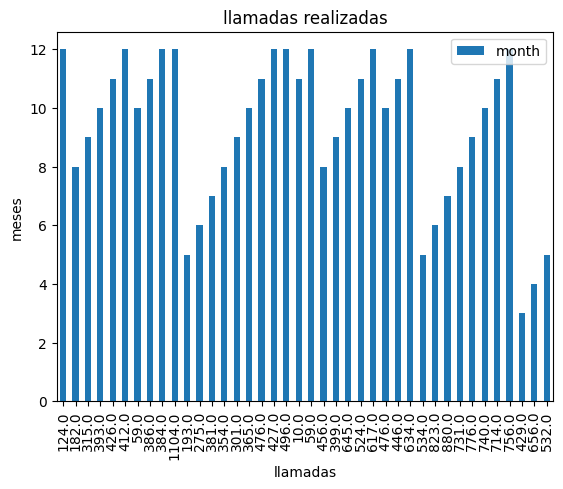

In [40]:


consumo_tarifario[consumo_tarifario.index < 40].plot(kind='bar',
                       x = 'minutos_usados',
                       y = 'month',
                        title= 'llamadas realizadas',
                        xlabel = 'llamadas',
                        ylabel ='meses',
                          )

plt.show()

In [41]:
columnas_minutos = ['minutos_usados']
plans = ['surf', 'ultimate']

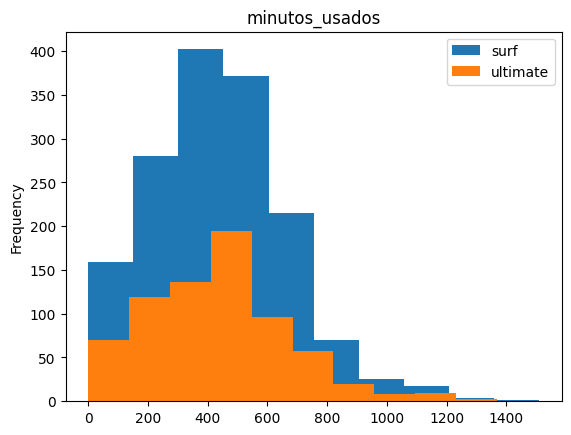

In [42]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
for columna in columnas_minutos:
    for plan in plans:
        consumo_tarifario[consumo_tarifario['plan_name']==plan][columna].plot(kind = 'hist', title = 'minutos_usados')

plt.legend(['surf', 'ultimate'])
plt.show()

#Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [43]:
media_minutos = np.mean(consumo_tarifario['minutos_usados'])
print(media_minutos)
varian_minutos= np.var(consumo_tarifario['minutos_usados']) # Calcula la media y la varianza de la duración mensual de llamadas.
print(varian_minutos)


435.9375553587245
53787.33666754012


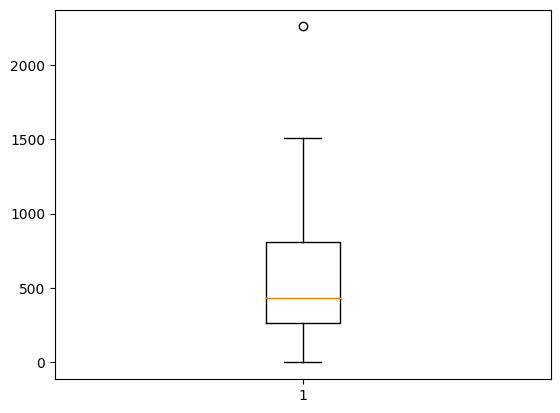

In [44]:
consumo_tarifario['minutos_usados'] = consumo_tarifario['minutos_usados'].sort_values()

plt.boxplot(consumo_tarifario['minutos_usados'].describe()) # Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.show()


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

### Mensajes

In [45]:
def chargeable_message (row): 
    plan = row['plan_name'] 
    total_mensajes = row['total_mensajes']
    
    mensajes_cobrables = 0

    if plan == 'surf': 
        if total_mensajes > surf_month_sms: 
            mensajes_cobrables = total_mensajes - surf_month_sms       

    elif plan == 'ultimate': 
        if total_mensajes > ultimate_month_sms: 
            mensajes_cobrables = total_mensajes - ultimate_month_sms
    return mensajes_cobrables
               
consumo_tarifario['chargeable_message'] = consumo_tarifario.apply(chargeable_message, axis =1) 
consumo_tarifario.head() 


 # Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan



,user_id,month,minutos_usados,llamadas_realizadas,total_mensajes,total_datos,total_de_datos_redondeado,plan_name,city,chargeable_calls,chargeable_message
0,1000,12.0,124.0,16.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0,0.0
1,1001,8.0,182.0,27.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0
2,1001,9.0,315.0,49.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0
3,1001,10.0,393.0,65.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,3.0
4,1001,11.0,426.0,64.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0


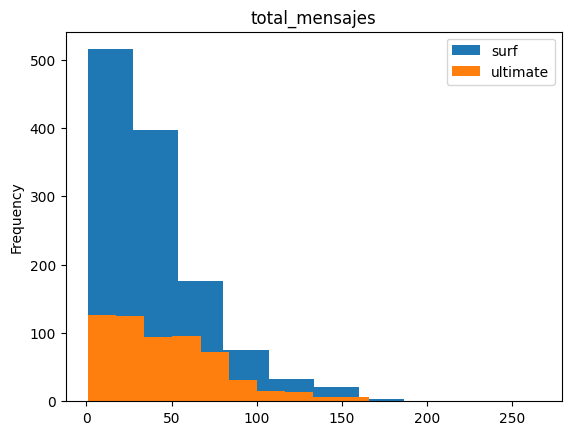

In [46]:
columnas_mensajes = ['total_mensajes']
plans = ['surf', 'ultimate']

for columna in columnas_mensajes:
    for plan in plans:
        consumo_tarifario[consumo_tarifario['plan_name']==plan][columna].plot(kind = 'hist', title= 'total_mensajes')

plt.legend(['surf', 'ultimate'])
plt.show()


In [47]:
media_minutos = np.mean(consumo_tarifario['total_mensajes'])
print(media_minutos)
varian_minutos= np.var(consumo_tarifario['total_mensajes']) # Calcula la media y la varianza de la duración mensual de llamadas.
print(varian_minutos)


42.110188261351055
1096.5210811384227


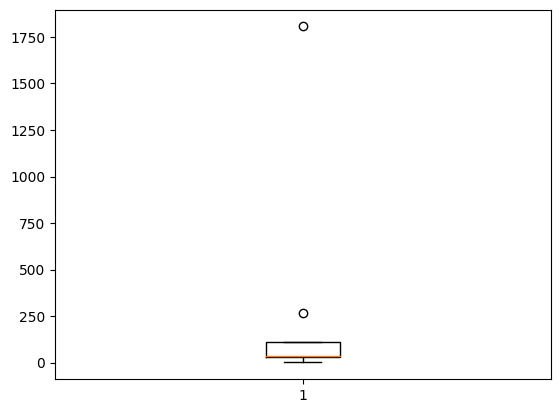

In [48]:
consumo_tarifario['total_mensajes'] = consumo_tarifario['total_mensajes'].sort_values()

plt.boxplot(consumo_tarifario['total_mensajes'].describe()) # Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

### Internet

In [49]:
def chargeable_datos (row): 
    plan = row['plan_name'] 
    total_datos = row['total_de_datos_redondeado'] 

    datos_cobrables = 0
  
    if plan == 'surf': 
        if total_datos > surf_month_gb: 
            datos_cobrables = total_datos - surf_month_gb 
         

    elif plan == 'ultimate': 
        if total_datos > ultimate_month_gb: 
            datos_cobrables = total_datos - ultimate_month_gb 

        
    return datos_cobrables 

consumo_tarifario['chargeable_datos'] = consumo_tarifario.apply(chargeable_datos, axis =1) 
consumo_tarifario


  # Compara la cantidad de tráfico de Internet consumido por usuarios por plan


,user_id,month,minutos_usados,llamadas_realizadas,total_mensajes,total_datos,total_de_datos_redondeado,plan_name,city,chargeable_calls,chargeable_message,chargeable_datos
0,1000,12.0,124.0,16.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0,0.0,0.0
1,1001,8.0,182.0,27.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,0.0
2,1001,9.0,315.0,49.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,0.0
3,1001,10.0,393.0,65.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,3.0,7.0
4,1001,11.0,426.0,64.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1307,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Boston-Cambridge-Newton, MA-NH MSA",0.0,0.0,0.0
2299,1319,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Colorado Springs, CO MSA",0.0,0.0,0.0
2300,1378,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Denver-Aurora-Lakewood, CO MSA",0.0,0.0,0.0
2301,1463,NaN,NaN,NaN,NaN,NaN,NaN,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0,0.0,0.0


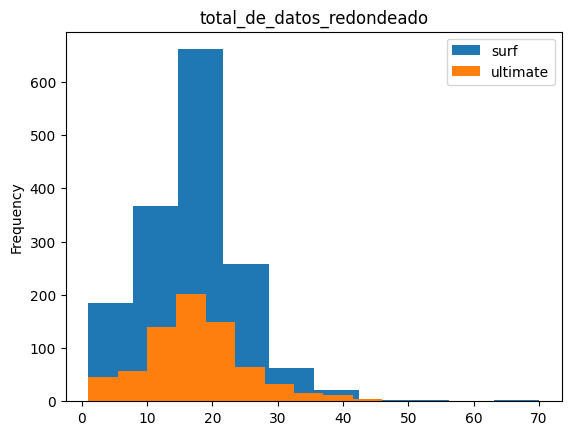

In [50]:
columnas_datos = ['total_de_datos_redondeado']
plans = ['surf', 'ultimate']

for columna in columnas_datos:
    for plan in plans:
        consumo_tarifario[consumo_tarifario['plan_name']==plan][columna].plot(kind = 'hist',
                                                                             title = 'total_de_datos_redondeado' 
                                                                              )

plt.legend(['surf', 'ultimate'])
plt.show()

In [51]:
media_minutos = np.mean(consumo_tarifario['total_de_datos_redondeado'])
print(media_minutos)
varian_minutos= np.var(consumo_tarifario['total_de_datos_redondeado']) # Calcula la media y la varianza de la duración mensual de llamadas.
print(varian_minutos)


16.989020641194553
59.166765707523


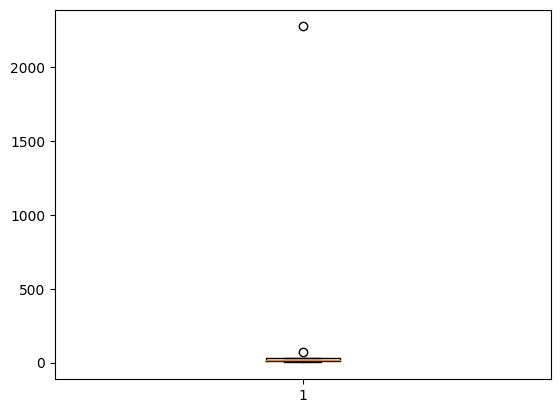

In [52]:
consumo_tarifario['total_de_datos_redondeado'] = consumo_tarifario['total_de_datos_redondeado'].sort_values()

plt.boxplot(consumo_tarifario['total_de_datos_redondeado'].describe()) # Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.show()


[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [53]:
def monthly_rev(row): 
    plan = row['plan_name'] 
    chargeable_calls = row['chargeable_calls'] 
    chargeable_message = row['chargeable_message'] 
    chargeable_data = row['chargeable_datos'] 

    revenue = 0
    
    if plan == 'surf': 
        revenue = surf_month +(chargeable_calls * surf_call) + (chargeable_message * surf_message) + (chargeable_data * surf_gb)

    elif plan == 'ultimate':
        revenue = ultimate_month +(chargeable_calls * ultimate_call) + (chargeable_message * ultimate_message) + (chargeable_data * ultimate_gb) 
    return revenue 


In [54]:
consumo_tarifario['monthly_revenue'] = consumo_tarifario.apply(monthly_rev, axis =1) 
consumo_tarifario.head()  

,user_id,month,minutos_usados,llamadas_realizadas,total_mensajes,total_datos,total_de_datos_redondeado,plan_name,city,chargeable_calls,chargeable_message,chargeable_datos,monthly_revenue
0,1000,12.0,124.0,16.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0,0.0,0.0,70.00
1,1001,8.0,182.0,27.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,0.0,20.00
2,1001,9.0,315.0,49.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,0.0,20.00
3,1001,10.0,393.0,65.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,3.0,7.0,90.09
4,1001,11.0,426.0,64.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,4.0,60.00


In [55]:
ingresos= consumo_tarifario.groupby('plan_name')['monthly_revenue'].describe()
ingresos = ingresos.reset_index()
ingresos

,plan_name,count,mean,std,min,25%,50%,75%,max
0,surf,1579.0,60.551729,55.339379,20.0,20.0,40.18,80.315,590.37
1,ultimate,724.0,72.301105,11.364839,70.0,70.0,70.00,70.000,182.00


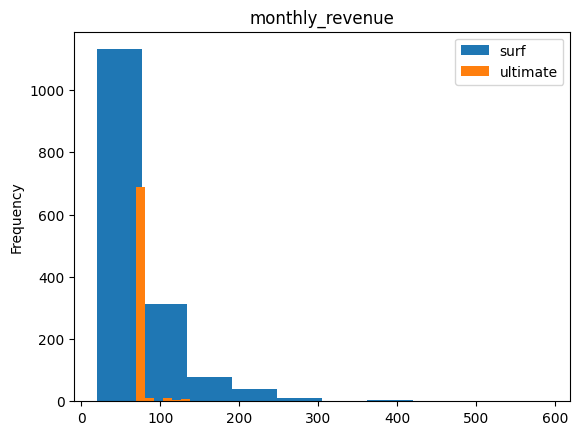

In [56]:

columnas_ingresos = ['monthly_revenue']
plans = ['surf', 'ultimate']

for columna in columnas_ingresos:
    for plan in plans:
        consumo_tarifario[consumo_tarifario['plan_name']==plan][columna].plot(kind = 'hist',
                                                                              title = 'monthly_revenue')
                                                                        
plt.legend(['surf', 'ultimate'])
plt.show()


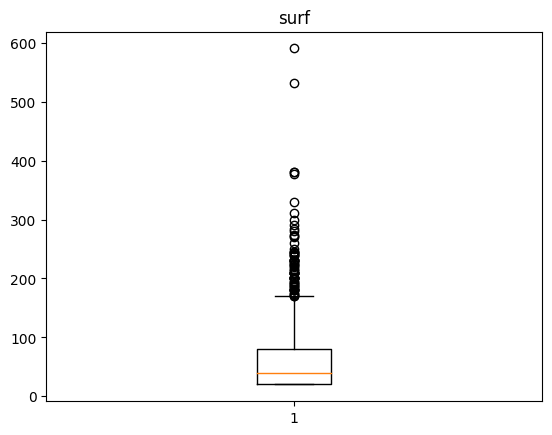

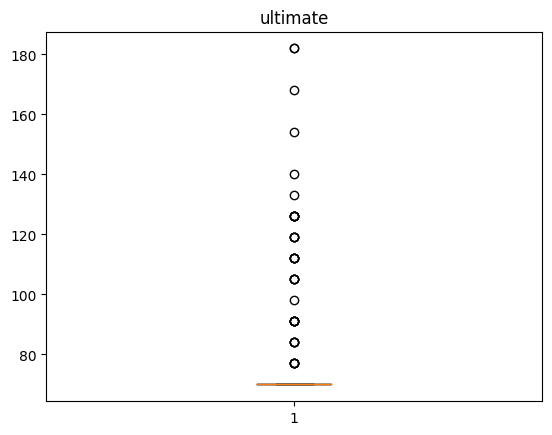

In [57]:
for columna in columnas_ingresos:
    for plan in plans:
        plt.boxplot(consumo_tarifario[consumo_tarifario['plan_name']==plan][columna].dropna())
        plt.title(plan)
        plt.show()

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [58]:
plans = ['surf', 'ultimate']

for plan in plans:
    rentabilidad = consumo_tarifario[consumo_tarifario['plan_name'] == plan]['monthly_revenue'].sum()
    rentabilidad_promedio = consumo_tarifario[consumo_tarifario['plan_name'] == plan]['monthly_revenue'].mean()
    print(f'La rentabilidad mensual del plan {plan} es de {rentabilidad}')
    print(f'La rentabilidad mensual promedio del plan {plan} es de { rentabilidad_promedio}')

La rentabilidad mensual del plan surf es de 95611.18
La rentabilidad mensual promedio del plan surf es de 60.551728942368584
La rentabilidad mensual del plan ultimate es de 52346.0
La rentabilidad mensual promedio del plan ultimate es de 72.3011049723757


In [59]:
variable_1 =consumo_tarifario.query('plan_name == "surf"')['monthly_revenue']
print(variable_1)
variable_2 =consumo_tarifario.query('plan_name == "ultimate"')['monthly_revenue']
print(variable_2)

1       20.00
2       20.00
3       90.09
4       60.00
5       60.00
        ...  
2295    20.00
2298    20.00
2299    20.00
2300    20.00
2302    20.00
Name: monthly_revenue, Length: 1579, dtype: float64
0       70.0
19      70.0
20      84.0
26      70.0
27      70.0
        ... 
2292    70.0
2293    70.0
2296    70.0
2297    70.0
2301    70.0
Name: monthly_revenue, Length: 724, dtype: float64


In [60]:

alpha = 0.05

results = st.ttest_ind(
    variable_1, 
    variable_2, equal_var=False )
print('valor p: ', results.pvalue)

if (results.pvalue < alpha):
        print("Rechazamos la hipótesis nula")
else:
        print("No podemos rechazar la hipótesis nula")
   
   

# Prueba las hipótesis



valor p:  1.218411585212325e-15
Rechazamos la hipótesis nula


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [61]:
consumo_tarifario['city'].unique()

array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'Seattle-Tacoma-Bellevue, WA MSA',
       'Las Vegas-Henderson-Paradise, NV MSA', 'Tulsa, OK MSA',
       'Dallas-Fort Worth-Arlington, TX MSA',
       'San Francisco-Oakland-Berkeley, CA MSA',
       'Grand Rapids-Kentwood, MI MSA',
       'Orlando-Kissimmee-Sanford, FL MSA',
       'San Jose-Sunnyvale-Santa Clara, CA MSA',
       'Cleveland-Elyria, OH MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA', 'Knoxville, TN MSA',
       'New York-Newark-Jersey City, NY-NJ-PA MSA', 'Pittsburgh, PA MSA',
       'Fresno, CA MSA',
       'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA', 'Jacksonville, FL MSA',
       'Los Angeles-Long Beach-Anaheim, CA MSA',
       'Omaha-Council Bluffs, NE-IA MSA',
       'Houston-The Woodlands-Sugar Land, TX MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Tampa-St. Petersburg-Clearwater, FL MSA',
       'Birmingham-Hoover, AL MSA'

In [62]:
variable_1 =consumo_tarifario.query('city == "NY-NJ"')['monthly_revenue']
print(variable_1)
variable_2 =consumo_tarifario.query('city == "NY-NJ"')['monthly_revenue']
print(variable_2)

Series([], Name: monthly_revenue, dtype: float64)
Series([], Name: monthly_revenue, dtype: float64)


In [63]:
NY_NJ = consumo_tarifario[consumo_tarifario['city'].str.contains('NJ','NY')]
resultados = NY_NJ['monthly_revenue']
otras_regiones = consumo_tarifario[~consumo_tarifario['city'].str.contains('NJ','NY')]['monthly_revenue']
print(resultados)
print(otras_regiones)

56       20.00
57       38.84
75       20.00
76      100.00
77       20.00
         ...  
2265    170.27
2266    200.00
2267    110.33
2268     40.00
2297     70.00
Name: monthly_revenue, Length: 460, dtype: float64
0       70.00
1       20.00
2       20.00
3       90.09
4       60.00
        ...  
2298    20.00
2299    20.00
2300    20.00
2301    70.00
2302    20.00
Name: monthly_revenue, Length: 1843, dtype: float64


In [64]:

alpha= 0.05

results = st.ttest_ind(resultados, otras_regiones)
print('valor p: ', results.pvalue)

if (results.pvalue < alpha):
        print("Rechazamos la hipótesis nula")
else:
        print("No podemos rechazar la hipótesis nula")
    # Prueba las hipótesis



valor p:  0.06063753407168088
No podemos rechazar la hipótesis nula


## Conclusión general



En nuestras pruevas de hipotesis podemos darnos cuenta que no son muy diferentes los ingresos entre un plan surft y ultimate.
tambienpodemos observar que el ingreso promedio entre NY-NJ si es diferente de otras areas.